In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import confmain
from util_module import util_func
from util_module.util_func import plot_rhytm, plot_rhytm_gt_pred

In [2]:
LEAD = 'ii'

train_set, val_set, test_set, zpad_length = util_func.get_x_y(f'../data/ludb_processed/ludb_{LEAD}.pickle')

X_train, y_train = train_set
X_val, y_val = val_set
X_test, y_test = test_set

zpad_length_train, zpad_length_val, zpad_length_test = zpad_length

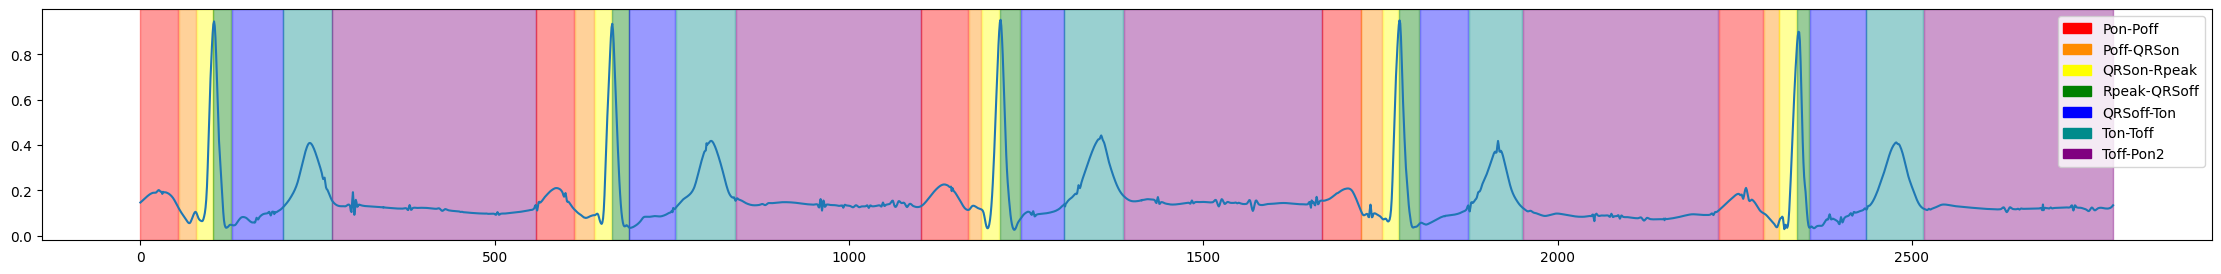

In [3]:
plot_rhytm(X_val, y_val, zpad=zpad_length_val, start_idx=13, length=5)

In [4]:
model = tf.keras.models.load_model(f'../model/{LEAD}-TransferLearning_Hafizh.h5')

y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

4/4 [==============================] - 30s 7s/step


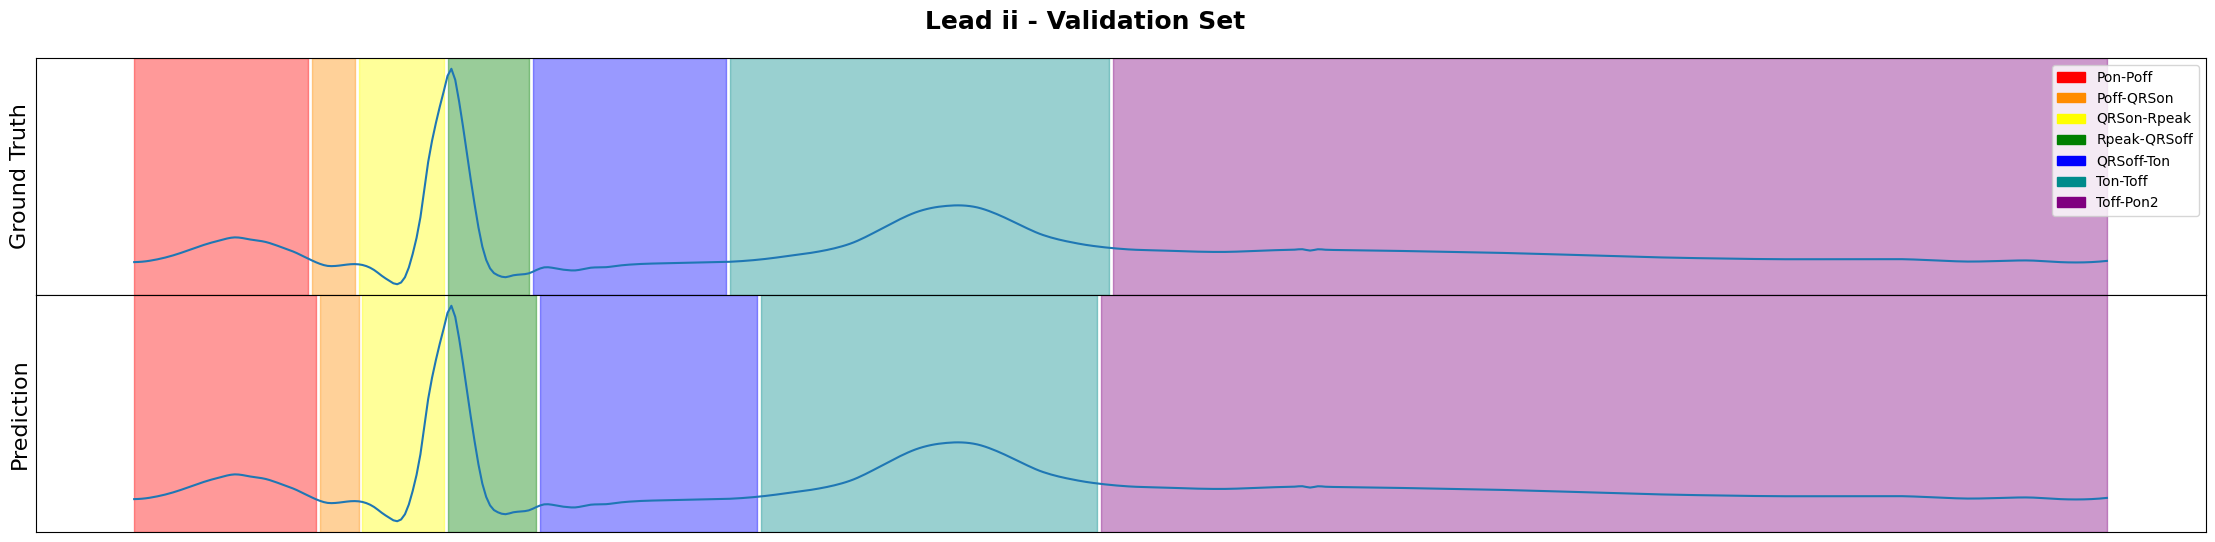

In [5]:
plot_rhytm_gt_pred(X_val, y_val, y_pred_val,
                   zpad=zpad_length_val,
                   start_idx=41,
                   length=1,
                   fig_title=f'Lead {LEAD} - Validation Set',
                   save_path=f'../result/{LEAD}_val.jpg')

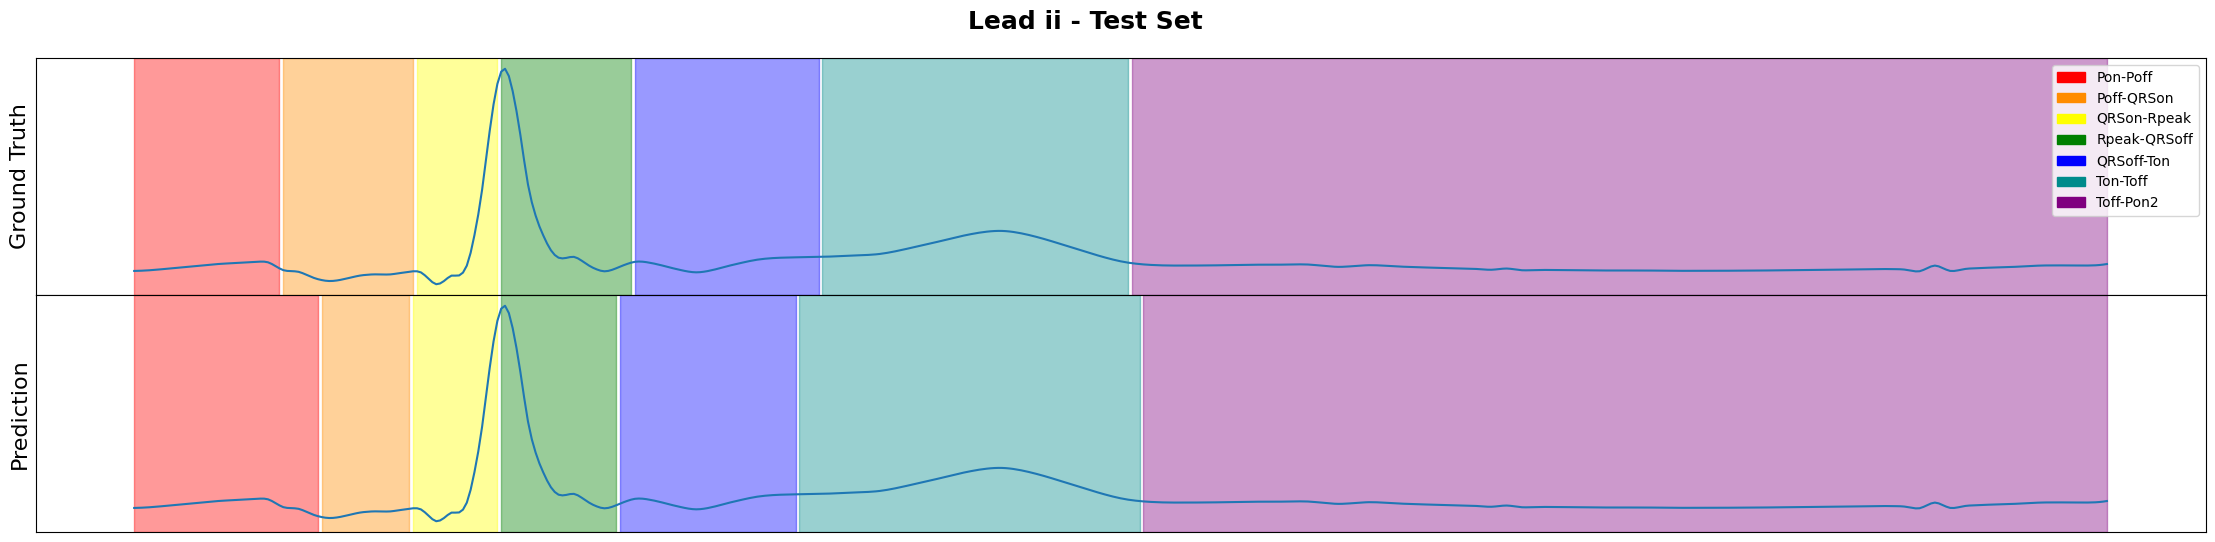

In [6]:
plot_rhytm_gt_pred(X_test, y_test, y_pred_test,
                   zpad=zpad_length_test,
                   start_idx=74,
                   length=1,
                   fig_title=f'Lead {LEAD} - Test Set',
                   save_path=f'../result/{LEAD}_test.jpg')